In [1]:
from scalar import Scalar
from simple_nn import ScalarNeuron, ScalarLayer, ScalarMLP

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
shape = (4, 3)
data = np.random.uniform(-1, 3, size=shape)
y = np.random.choice([-1, 1], size=shape[0])
data, y

(array([[ 2.43987665,  1.10510912,  1.1143344 ],
        [ 2.18858285,  1.58046222, -0.06629643],
        [ 2.34499586,  2.62153331,  0.98365424],
        [ 1.16899138,  0.63269743,  2.89574943]]),
 array([ 1, -1,  1, -1]))

In [3]:
model = ScalarMLP(shape[1], [4, 4, 1])
epochs = 100
loss_arr = np.zeros(epochs)

for e in tqdm(range(epochs)):
    # forward
    ypred = [model(x) for x in data]
    loss: Scalar = sum((yout[0] - ygt)**2 for ygt, yout in zip(y, ypred))
    # backward
    model.zero_grad()
    loss.backward()
    # update
    for p in model.parameters():
        p.data += -.01 * p.grad
    loss_arr[e] = loss.data

f'Loss: {loss.data}'

100%|██████████| 100/100 [00:00<00:00, 240.52it/s]


'Loss: 0.14235159357219698'

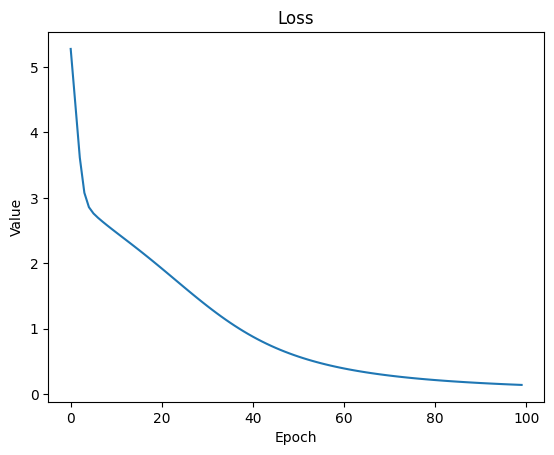

In [4]:
plt.plot(loss_arr)
plt.title('Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Value')
plt.show()

In [13]:
list(zip([yp[0].data for yp in ypred], y))

[(0.7954593193750483, 1),
 (-0.7542770013156617, -1),
 (0.8576542937840698, 1),
 (-0.859029750013901, -1)]